# Titanic: Machine Learning from Disaster

## EDA and data cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, accuracy_score, roc_curve, roc_auc_score
from sklearn.linear_model import LinearRegression, LassoCV, LogisticRegression, Lasso, RidgeCV, Ridge
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
plt.style.use('ggplot')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# read the train and test data 
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [3]:
test.shape, train.shape

((418, 11), (891, 12))

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_ws = train.drop("Survived", axis=1)
titanic = pd.concat([test,train_ws], copy =False, ignore_index=True)

In [6]:
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
titanic.shape

(1309, 11)

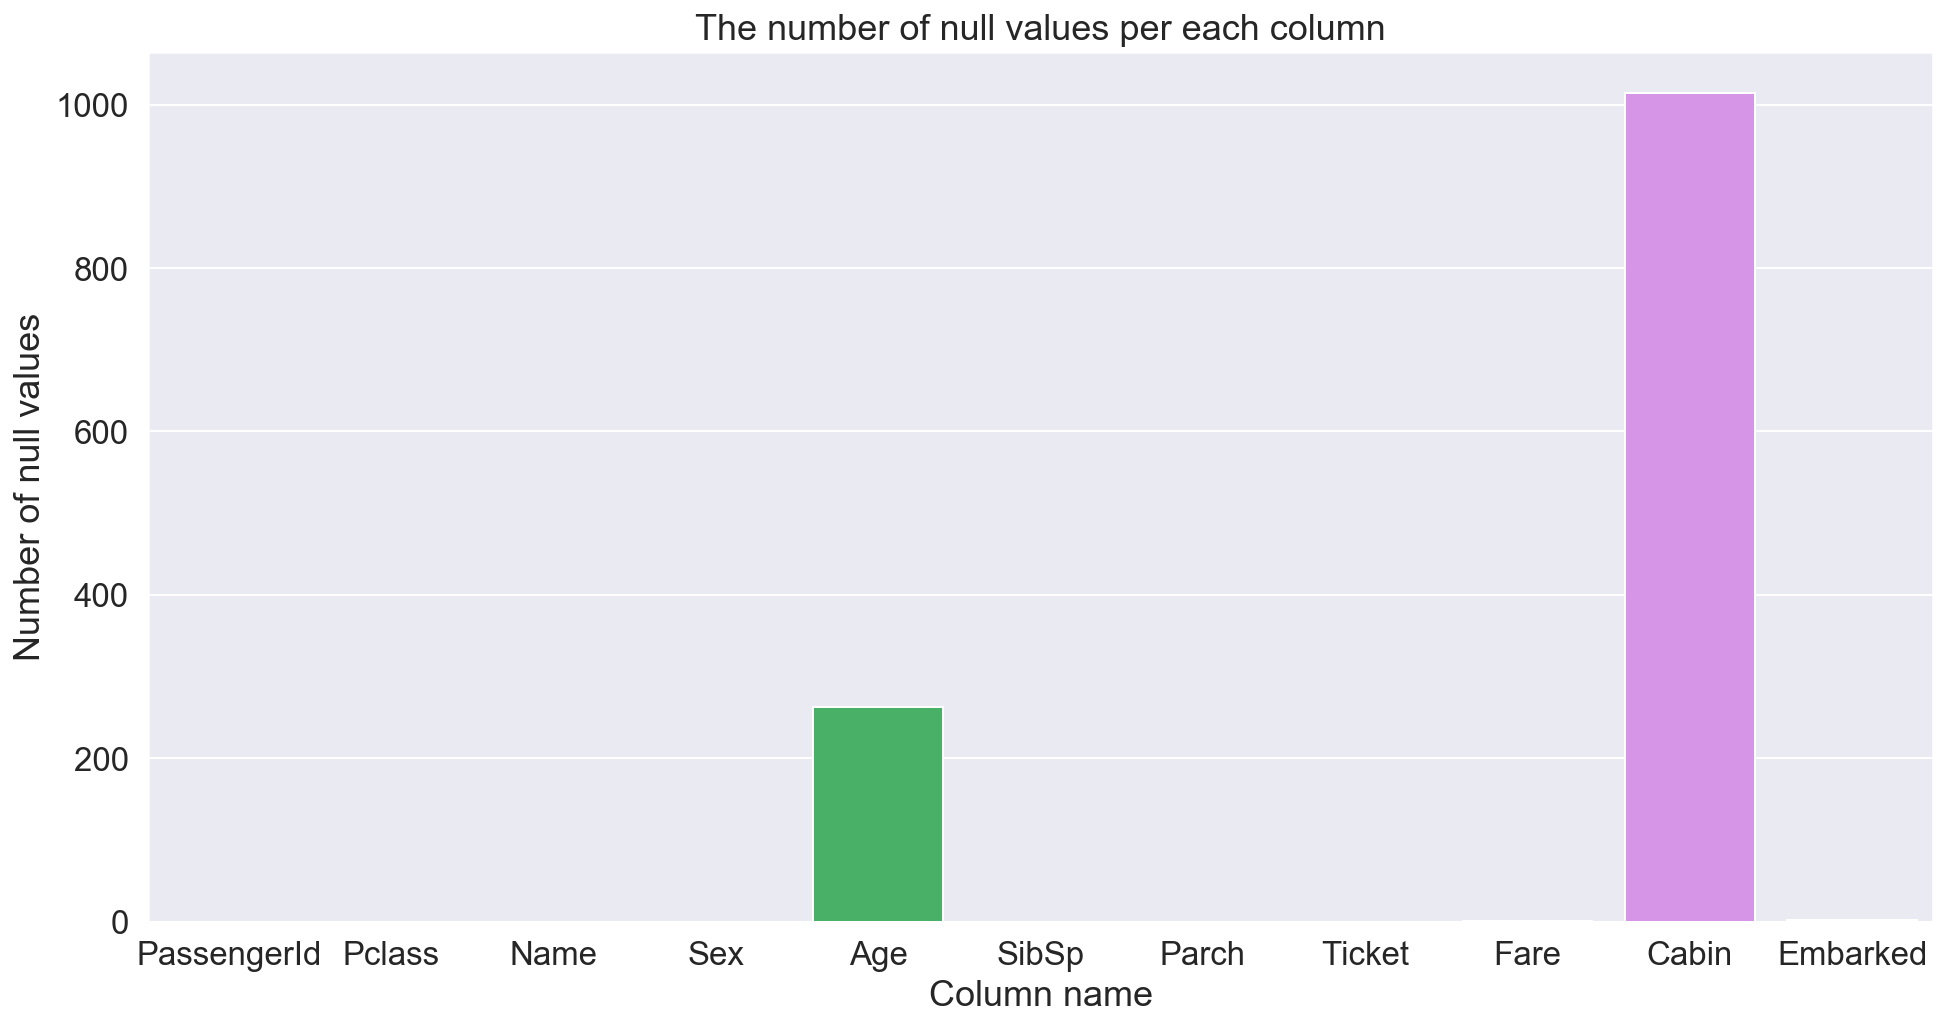

In [8]:
columns = list(titanic.isnull().sum().index)
null_sum = list(titanic.isnull().sum().values)
plt.figure(figsize=(16, 8))
plt.xlabel("Column name")
plt.ylabel("Number of null values")
plt.title("The number of null values per each column")
sns.barplot(x = columns, y =null_sum)
plt.show()


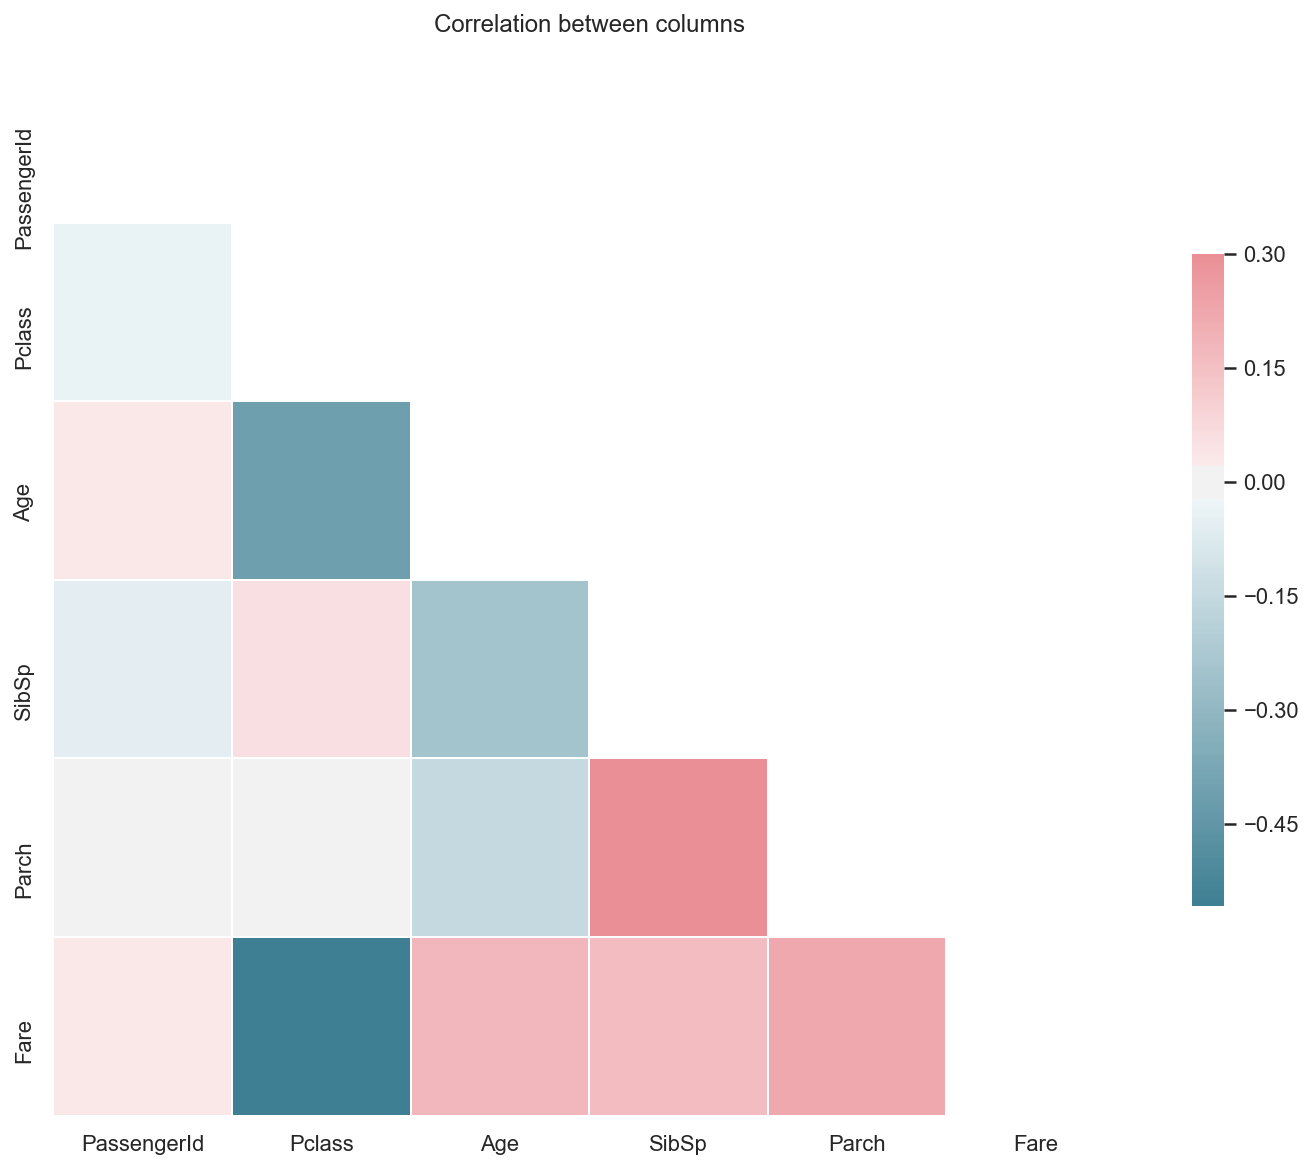

In [9]:

sns.set(style="white")
corr = titanic.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
plt.figure(figsize=(12,12))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation between columns")
plt.show()

C:\Users\hp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\hp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


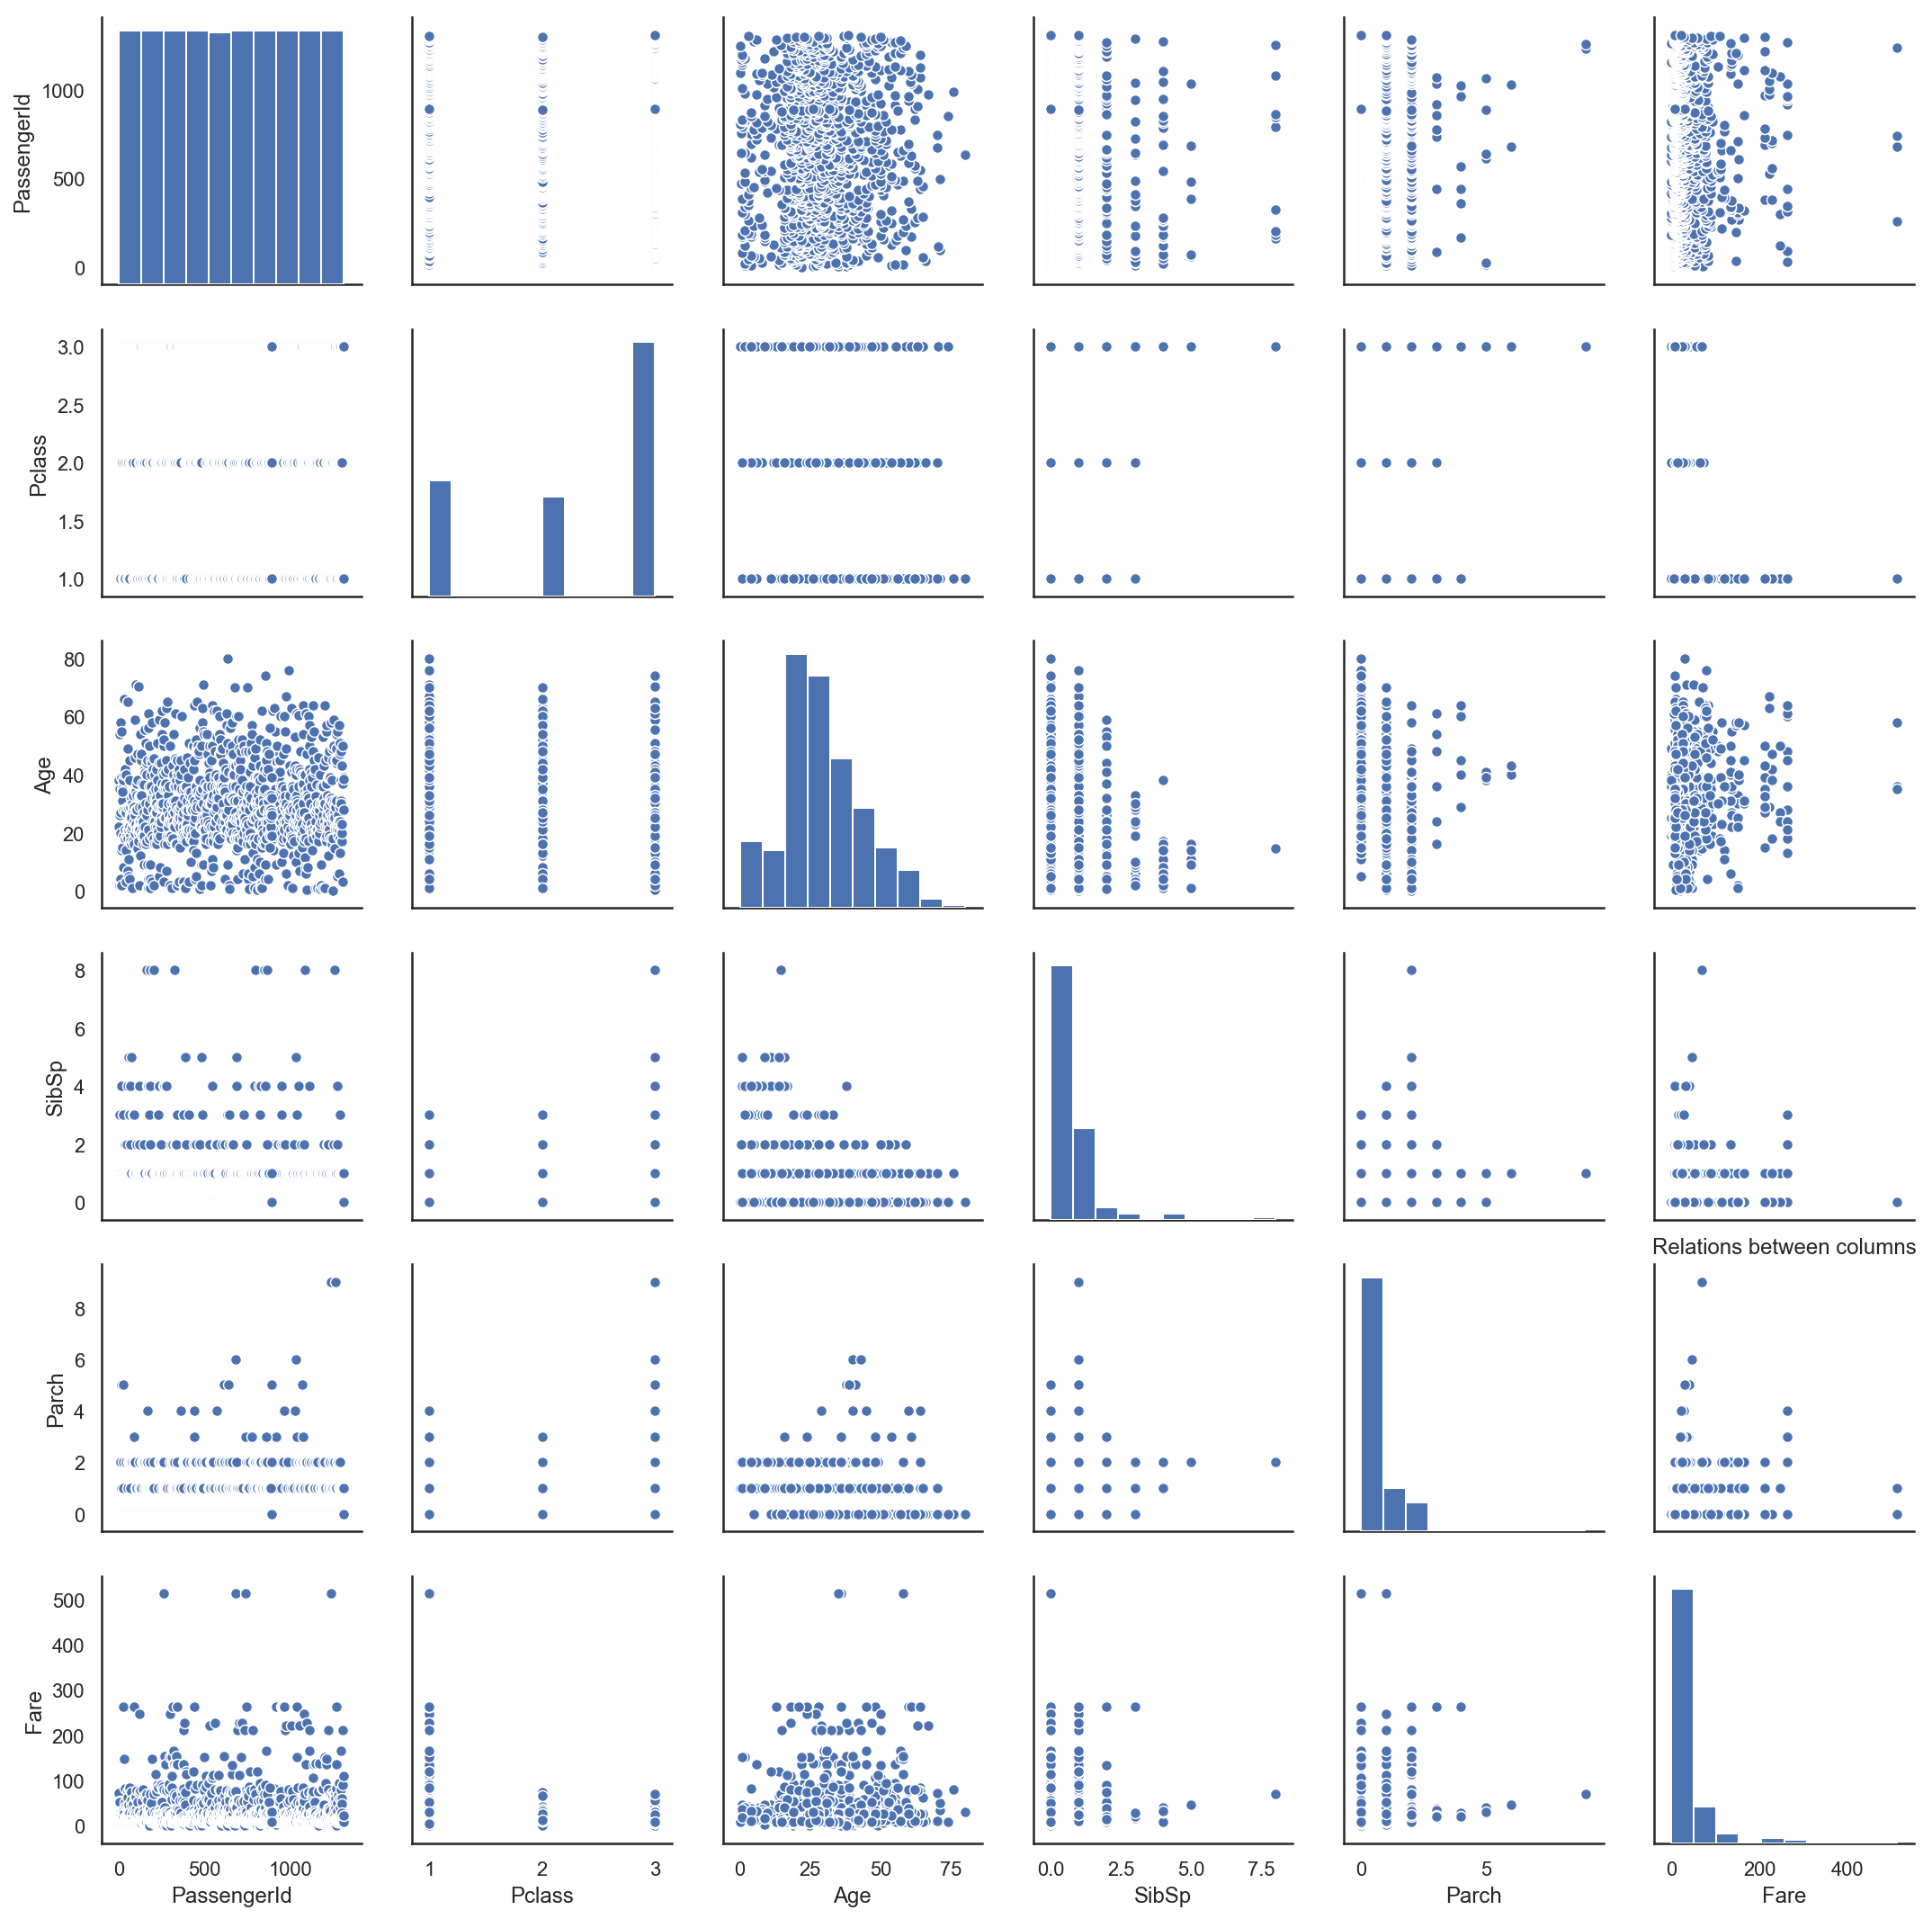

In [10]:
sns.pairplot(titanic)
plt.title("Relations between columns")
plt.show()

In [11]:
titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


## Fill the null values

In [13]:
titanic.groupby("Pclass").count()

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,
1,323,323,323,284,323,323,323,323,256,321
2,277,277,277,261,277,277,277,277,23,277
3,709,709,709,501,709,709,709,708,16,709


In [14]:
titanic[titanic["Pclass"]==1].Cabin.unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'B61', 'C53', 'D43',
       'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116', 'A29',
       'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22', 'B10', 'E45',
       'E52', 'D30', 'B58 B60', 'E34', 'C62 C64', 'A11', 'B11', 'C80',
       'C85', 'D37', 'C86', 'D21', 'C89', 'A34', 'B26', 'C22 C26', 'B69',
       'C32', 'B78', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'C105', 'C123', 'C103', 'A6', 'D33', 'B30', 'C52', 'B28',
       'C83', 'A5', 'D26', 'C110', 'D47', 'B86', 'C2', 'E33', 'B19', 'A7',
       'C49', 'A32', 'B4', 'B80', 'A31', 'D36', 'C93', 'D35', 'C87',
       'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49',
       'C65', 'E36', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'B35',
       'C82', 'B96 B98', 'E44', 'C104', 'C111', 'C92', 'E38', 'E12',
   

In [15]:
titanic[titanic["Pclass"]==2].Cabin.unique()

array([nan, 'F', 'F4', 'F33', 'D', 'F2', 'D38', 'D56', 'E101', 'E77'],
      dtype=object)

In [16]:
titanic[titanic["Pclass"]==3].Cabin.unique()

array([nan, 'F G63', 'G6', 'F E46', 'F E57', 'F G73', 'F E69', 'E10',
       'E121', 'F38'], dtype=object)

In [17]:
titanic[titanic["Pclass"]==3].Cabin.value_counts()

G6       5
F G63    2
F G73    2
E121     2
F E69    1
E10      1
F38      1
F E46    1
F E57    1
Name: Cabin, dtype: int64

In [18]:
titanic[titanic["Pclass"]==2].Cabin.value_counts()

F2      4
D       4
F33     4
F4      4
E101    3
D38     1
F       1
E77     1
D56     1
Name: Cabin, dtype: int64

**The Cabin code for each class in Titanic**  
<img src = "687px-Titanic_cutaway_diagram.png">

In [19]:
titanic.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [20]:
 import math
titanic["Deck"] = titanic.Cabin.map(lambda x : "N" if type(x) == float  else x[0])

In [21]:
titanic["Deck"].value_counts()

N    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Deck, dtype: int64

In [24]:
# A1: Create a new column called FamilyCount
titanic["FamilyCount"] = titanic.apply(lambda row: row.SibSp + row.Parch , axis = 1) 

In [26]:
titanic["FamilyCount"].value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: FamilyCount, dtype: int64

In [37]:
# Extract the title from everyone's name
titels = list(set([name.split(",")[1].split(".")[0]+"." for name in titanic["Name"]]))
titels

[' Dr.',
 ' Ms.',
 ' Capt.',
 ' Don.',
 ' Major.',
 ' Dona.',
 ' Mlle.',
 ' Master.',
 ' Lady.',
 ' Mme.',
 ' Mr.',
 ' Sir.',
 ' Mrs.',
 ' Miss.',
 ' the Countess.',
 ' Jonkheer.',
 ' Rev.',
 ' Col.']

In [46]:
# the set_title function takes a data frame row and returns the title of a person  
def set_title(row):
    for title in titels:
        if title in row["Name"]:
            return title
    

In [47]:
titanic["Title"] = titanic.apply(set_title, axis=1)

In [49]:
normalized_titles = {
    ' Capt.':       "Officer",
     ' Col.':        "Officer",
     ' Major.':      "Officer",
    ' Jonkheer.':   "Royalty",
    ' Don.':        "Royalty",
    ' Sir.' :       "Royalty",
    ' Dr.':         "Officer",
    ' Rev.':        "Officer",
   ' the Countess.':"Royalty",
    ' Dona.':       "Royalty",
   ' Mme.':        "Mrs",
    ' Mlle.':       "Miss",
     ' Ms.':         "Mrs",
     ' Mr.':        "Mr",
    ' Mrs.':       "Mrs",
    ' Miss.' :      "Miss",
     ' Master.':    "Master",
     ' Lady.':      "Royalty"
}

titanic["Title_norm"] = titanic.Title.map(normalized_titles)


In [51]:
titanic["Title_norm"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Officer', 'Royalty'], dtype=object)

In [60]:
titles = list(titanic["Title_norm"].unique())
titles_age_mean = dict(titanic.groupby("Title_norm").mean()["Age"])    

In [65]:
def fill_age(row):
    if np.isnan(row.Age): 
        row.Age = titles_age_mean[row.Title_norm] 
    return row 
titanic = titanic.apply(fill_age, axis=1)

In [66]:
titanic.Age.isnull().sum()

0

In [67]:
titanic.Age = titanic.Age.map(lambda x: int(round(x)))

In [69]:
def set_age_group(row):
    age = row["Age"]
    if age < 12:
        return "Child"
    elif age >= 12 and age < 25:
        return "Teenager"
    elif age >= 25 and age < 60:
        return "Adult"
    else:
        return "Elderly"

In [71]:
titanic["Age_group"] = titanic.apply(set_age_group, axis=1)

In [73]:
titanic.Fare

0          Adult
1          Adult
2        Elderly
3          Adult
4       Teenager
5       Teenager
6          Adult
7          Adult
8       Teenager
9       Teenager
10         Adult
11         Adult
12      Teenager
13       Elderly
14         Adult
15      Teenager
16         Adult
17      Teenager
18         Adult
19         Adult
20         Adult
21         Child
22         Adult
23      Teenager
24         Adult
25         Adult
26      Teenager
27      Teenager
28         Adult
29         Adult
          ...   
1279    Teenager
1280       Adult
1281    Teenager
1282    Teenager
1283       Adult
1284       Adult
1285       Adult
1286       Adult
1287       Child
1288       Adult
1289       Adult
1290       Adult
1291       Adult
1292       Adult
1293    Teenager
1294    Teenager
1295    Teenager
1296       Adult
1297       Adult
1298       Adult
1299       Adult
1300    Teenager
1301       Adult
1302       Adult
1303       Adult
1304       Adult
1305    Teenager
1306    Teenag